In [143]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json
import seaborn as sns



In [114]:
df = pd.read_csv("Data/superhero_info - superhero_info.csv")
df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [115]:
#convert into dictionary
Measurements = df.loc[0, "Measurements"]
print(type(Measurements))
Measurements

<class 'str'>


"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [116]:
Measurements = Measurements.replace("'",'"')
Measurements



'{"Height": "203.0 cm", "Weight": "441.0 kg"}'

In [117]:
fixed_Measurements = json.loads(Measurements)
print(type(fixed_Measurements))
fixed_Measurements


<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [118]:
df['Measurements'] = df['Measurements'].str.replace("'",'"')
df['Measurements'] = df['Measurements'].apply(json.loads)
df['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [119]:
HW = df['Measurements'].apply(pd.Series)
HW

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [120]:
# concat long_lat with original dataframe
df = pd.concat((df, HW), axis = 1)
df.head(2)


,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Height,Weight
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",203.0 cm,441.0 kg
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",191.0 cm,65.0 kg


In [121]:
df = df.drop(columns=['Measurements'])

In [122]:
df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0 cm,441.0 kg
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0 cm,65.0 kg
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,185.0 cm,90.0 kg
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,203.0 cm,441.0 kg
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,193.0 cm,122.0 kg


In [123]:
HP = df.loc[2,'Hero|Publisher']
print(type(HP))
HP

<class 'str'>


'Abin Sur|DC Comics'

In [124]:
df[['Hero','Publisher']] = df['Hero|Publisher'].str.split('|', expand=True)

In [125]:
df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0 cm,441.0 kg,A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0 cm,65.0 kg,Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,185.0 cm,90.0 kg,Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,203.0 cm,441.0 kg,Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,193.0 cm,122.0 kg,Absorbing Man,Marvel Comics


In [126]:
df = df.drop(columns=('Hero|Publisher'))

In [127]:
df2 = pd.read_csv("Data/superhero_powers - superhero_powers.csv")



In [128]:
df2.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [130]:
df2['Powers'] = df2['Powers'].str.split(',')

In [131]:
df2['Powers'].value_counts()

[Intelligence]                                                                                                                                                                                                                                                                          8
[Durability, Super Strength]                                                                                                                                                                                                                                                            5
[Agility, Stealth, Marksmanship, Weapons Master, Stamina]                                                                                                                                                                                                                               4
[Marksmanship]                                                                                                                                            

In [132]:
exploded = df2.explode('Powers')
exploded[['hero_names','Powers']].head()

,hero_names,Powers
0,3-D Man,Agility
0,3-D Man,Super Strength
0,3-D Man,Stamina
0,3-D Man,Super Speed
1,A-Bomb,Accelerated Healing


In [133]:
cols_to_make = exploded['Powers'].dropna().unique()
for col in cols_to_make:
    df2[col] = df2['Powers'].str.contains(col)
df2.head()


C:\Users\cheye\AppData\Local\Temp\ipykernel_24192\1459862904.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].str.contains(col)
C:\Users\cheye\AppData\Local\Temp\ipykernel_24192\1459862904.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].str.contains(col)
C:\Users\cheye\AppData\Local\Temp\ipykernel_24192\1459862904.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

C:\Users\cheye\AppData\Local\Temp\ipykernel_24192\1459862904.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].str.contains(col)
C:\Users\cheye\AppData\Local\Temp\ipykernel_24192\1459862904.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].str.contains(col)
C:\Users\cheye\AppData\Local\Temp\ipykernel_24192\1459862904.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

C:\Users\cheye\AppData\Local\Temp\ipykernel_24192\1459862904.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].str.contains(col)
C:\Users\cheye\AppData\Local\Temp\ipykernel_24192\1459862904.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].str.contains(col)
C:\Users\cheye\AppData\Local\Temp\ipykernel_24192\1459862904.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

,hero_names,Powers,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abin Sur,[Lantern Power Ring],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df2 = df2.copy()

In [135]:
for col in cols_to_make:
    df2[col] = df2['Powers'].str.contains(col)
df2.head()


,hero_names,Powers,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abin Sur,[Lantern Power Ring],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
left_df = df
right_df = df2
## merging with different column names
pd.merge(left_df, right_df, left_on='Hero', right_on='hero_names')



,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,Hero,Publisher,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,203.0 cm,441.0 kg,A-Bomb,Marvel Comics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0 cm,65.0 kg,Abe Sapien,Dark Horse Comics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,Ungaran,good,No Hair,blue,red,185.0 cm,90.0 kg,Abin Sur,DC Comics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Human / Radiation,bad,No Hair,green,Unknown,203.0 cm,441.0 kg,Abomination,Marvel Comics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Human,bad,No Hair,blue,Unknown,193.0 cm,122.0 kg,Absorbing Man,Marvel Comics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,183.0 cm,83.0 kg,Yellowjacket,Marvel Comics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,Female,Human,good,Strawberry Blond,blue,Unknown,165.0 cm,52.0 kg,Yellowjacket II,Marvel Comics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,Male,Yoda's species,good,White,brown,green,66.0 cm,17.0 kg,Yoda,George Lucas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,Female,Human,good,Black,blue,Unknown,170.0 cm,57.0 kg,Zatanna,DC Comics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
df3 = pd.merge(left_df, right_df, left_on='Hero', right_on='hero_names')


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      441.0 kg
1       65.0 kg
2       90.0 kg
3      441.0 kg
4      122.0 kg
         ...   
458     83.0 kg
459     52.0 kg
460     17.0 kg
461     57.0 kg
462     81.0 kg
Name: Weight, Length: 463, dtype: object

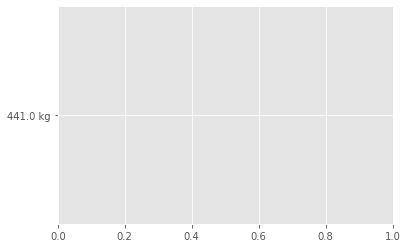

In [146]:
plt.style.use('ggplot')
plt.scatter(df3['Super Speed'], df['Weight'], c=df['Weight'], cmap='magma');
plt.colorbar(label='Weight')
plt.title('Speed to Weight Ratio')
plt.xlabel('Super Speed')
plt.ylabel('Weight');

In [ ]:
#No idea how to answer these questions 